# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

### Question to answer from data:
1. What age group is most likely to have a stroke?
2. Does gender correlate to having a stroke?
3. Which attributes are have the most correlation with having a stroke?
4. Are people that smoke are more likely to have a stroke?
5. Is hypertension and heart disease highly associated with stroke?

### Description of Information in Columns:

1. id: unique identifier

2. gender: "Male", "Female" or "Other"

3. age: age of the patient

4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6. ever_married: "No" or "Yes"

7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8. Residence_type: "Rural" or "Urban"

9. avg_glucose_level: average glucose level in blood

10. bmi: body mass index

11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12. stroke: 1 if the patient had a stroke or 0 if not

In [91]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [92]:
#import dataset

data=pd.read_csv('stroke_dataset.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [93]:
#checking for null values, bmi is only catergory to have NULL values.

data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

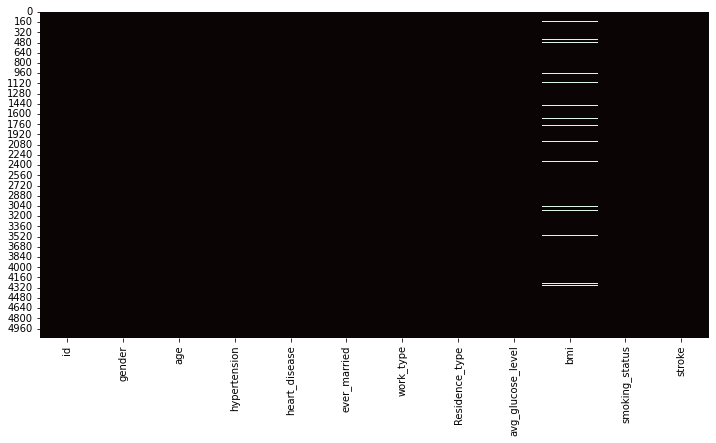

In [94]:
#visualization of NULL values

plt.figure(figsize = (12,6))
sns.heatmap(data.isnull(), cbar=False, cmap='mako')

In [95]:
#replace bmi with mean values since no difference between female and male

data.groupby('gender')['bmi'].mean()

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

In [96]:
#Replace NULL values with the mean bmi

avg_bmi=data['bmi'].astype('float').mean()
print('The average bmi is {}'.format(avg_bmi))
data['bmi'].fillna(value=avg_bmi, inplace=True)

The average bmi is 28.893236911794673


In [97]:
#after replacing bmi with the mean, there are no NULLS

data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [98]:
#only 1 row for 'other' gender, removing since it holds no value

data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [101]:
#dropping the 'other' gender row

data.drop(data[data['gender'] == 'Other'].index, inplace = True)
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [102]:
#Dropping the id column since it has no value

data.drop('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [103]:
#change Residence_type column to lower case to keep consistent

data.rename(columns={'Residence_type':'residence_type'}, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [104]:
#Change all values in columns to lowercase

col_case=['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

for col in col_case:
    data[col]=data[col].str.lower()
    
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.500000,never smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never smoked,1


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? Yes, there was missing data, irregular data, uneccessary data, and inconsistent data in the dataset. 
2. Did the process of cleaning your data give you new insights into your dataset? Yes, BMI is the only field with NULL values. Not much difference in average bmi in males and females.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? Does hypertension and heartdisease correlate with stroke. Does age correlate to hypertension and heartdisease? Does smoking effect heartdisease, hypertension and stoke?